<a href="https://colab.research.google.com/github/jytheodora/Gurobi_Study/blob/main/01_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   기존의 코로나19 환자 수용시설
*   의료진을 위한 임시시설 최소화

*   기존 수용시설에 코로나환자가 균등하게 할당되면서, 임시소 설치를 최소화 할 수 있는 최적화?


In [ ]:
# Gurobi 설치
%pip install gurobipy

     |████████████████████████████████| 11.1 MB 7.8 MB/s 


In [ ]:
from itertools import product

import gurobipy as gp
from gurobipy import GRB

import matplotlib.pyplot as plt
import random
from math import *

In [ ]:
m=gp.Model('Covid')

Restricted license - for non-production use only - expires 2022-01-13


### **Set**

    

1.   기존 코로나 시설 좌표 8개
2.   임시시설 좌표 후보군 9개


    

<function matplotlib.pyplot.show>

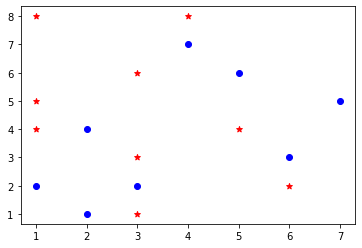

In [ ]:
exist_coordi = [[1,2], [3,2], [4,7], [2,4], [2,1], [5,6], [6,3], [7,5]]
new_coordi = [[1,4], [3,1], [6,2], [1,5], [3,3], [5,4], [1,8], [3,6], [4,8]]
x1,y1 = zip(*exist_coordi)
x2,y2 = zip(*new_coordi)
plt.scatter(x1,y1,c='blue')
plt.scatter(x2,y2,marker='*',c='Red')
plt.show

  
    

3.     기존 코로나 시설의 수용 인원 - 각 시설별 수용인원 

4.   임시시설별 수용 가능한 인원항목 추가
5.   전체 감염자 수


   

In [ ]:
#랜덤 리스트 함수
def random_ListE(size):
    result = []

    for v in range(size):
        result.append(random.randint(100,150))
        #최소 수용인원 100이라는 조건이 있어야 할 듯?

    return result

def random_ListN(size):
    result = []

    for v in range(size):
        result.append(random.randint(50,100))
        #임시수용소 최대 수용인원 = 기존시설 최소 수용인원

    return result

#변수생성
ea = random_ListE(8) #각 시설별 수용인원
na = random_ListN(9) #임시수용소별 수용인원
p = 1500 
#전체 감염자 수
#기존 최대 150*8 + 수용 최대 100*9 = 1200 + 900 = 2100보다 작은 수

print(ea)
print(na)
print(p)

[105, 145, 106, 130, 117, 100, 125, 104]
[73, 57, 59, 61, 72, 74, 97, 71, 78]
1500


In [ ]:
cf=[]
for i in c:
    for j in f:
        t=i,j
        cf.append(t)

print(cf)

NameError: ignored



```
# 코드로 형식 지정됨
```



6.  시설관리



In [ ]:
from itertools import *

def get_distance(loc1,loc2):
    dx=loc1[0]-loc2[0]
    dy=loc1[1]-loc2[1]
    return sqrt(dx*dx+dy*dy)

set = ea + na
print(set)

for com in combinations(set,2):
    print(com)

    dis = com
    merged_4 = list(map(list.__add__,dis[0],dis[1]))
    print(merged_4)

[105, 145, 106, 130, 117, 100, 125, 104, 73, 57, 59, 61, 72, 74, 97, 71, 78]
(105, 145)


TypeError: ignored

선태하는 임시수용소 수

In [ ]:
choice = 100

ㅕㄹ정변수

# ㅕㄹ정변수

1.   임시수용소 선태 되었냐 안되었냐?





# **모저변수**
1.   동등한 ㅓ리 할당?
2.   펴윤 이동ㅓ리 ㅏㅄ 최소화?






# **제야**

1.   위 일부 변수 설정시 제야 - 예상 환자수 / 수용소 수?



# FIN
    Function으로 만들어서 한번에 돌림

In [ ]:
#ㅓ리ㅖ산
def compute_distance(loc1, loc2):
    dx = loc1[0] - loc2[0]
    dy = loc1[1] - loc2[1]
    return sqrt(dx*dx + dy*dy)

In [ ]:
#코로나수용소 최저화
def solve_covid19_facility(c_coordinates, demand):
    
    # Indices
    counties = [*range(1,10)]
    facilities = [*range(1,24)]
    
    # 진료소,좌표,수용려
    existing, e_coordinates, e_capacity  = gp.multidict({
        1: [(1, 2), 281],
        2: [(2.5, 1), 187],
        3: [(5, 1), 200],
        4: [(6.5, 3.5), 223],
        5: [(1, 5), 281],
        6: [(3, 4), 281],
        7: [(5, 4), 222],
        8: [(6.5, 5.5), 200],
        9: [(1, 8.5), 250], 
        10: [(1.5, 9.5), 125],
        11: [(8.5, 6), 187],
        12: [(5, 8), 300],
        13: [(3, 9), 300],
        14: [(6, 9), 243]
    })
    
    # 임시,좌표,수용려
    temporary, t_coordinates, t_capacity  = gp.multidict({
        15: [(1.5, 1), 100],
        16: [(3.5, 1.5), 100],
        17: [(5.5, 2.5), 100],
        18: [(1.5, 3.5), 100],
        19: [(3.5, 2.5), 100],
        20: [(4.5, 4.5), 100],
        21: [(1.5, 6.5), 100],
        22: [(3.5, 6.5), 100],
        23: [(5.5, 6.5), 100]
    })
    
    # 10마일당 주행비용 - ㅓ리별 비용
    dcost = 5
    
    # 임시시설 설치비용
    tfcost = 500000

# Compute key parameters of MIP model formulation
    f_coordinates = {}
    for e in existing:
        f_coordinates[e] = e_coordinates[e]
    
    for t in temporary:
        f_coordinates[t] = t_coordinates[t]
    
    # Cartesian product of counties and facilities - ★???
    cf = []
    
    for c in counties:
        for f in facilities:
            tp = c,f
            cf.append(tp)
        
    # 카운티 중심지와 시설물 위치 ㅓ리 ㅖ산
    distance = {(c,f): compute_distance(c_coordinates[c], f_coordinates[f]) for c, f in cf}
    
    #####################################################
    #                    MIP Model Formulation
    #####################################################
    
    #모델 생성
    m = gp.Model('covid19_temporary_facility_location')
    y = m.addVars(temporary, vtype=GRB.BINARY, name='temporary')  # 임시시설ㅓㄴ설비용
    x = m.addVars(cf, vtype=GRB.CONTINUOUS, name='Assign')  # 카운티시설에 할당
    z = m.addVars(temporary, vtype=GRB.CONTINUOUS, name='addCap' ) #임시수용시설 용량추ㅏ
    
    #목적 함수: COVID-19 시설까지 총 주행 거리 최소화
    
    #임시 시설에서 용량을 추가할 경우 패널티 (+)
    bigM = 1e9
    
    m.setObjective(gp.quicksum(dcost*distance[c,f]*x[c,f] for c,f in cf) #Documentation - Reference Manual - F5
                   + tfcost*y.sum()
                   + bigM*z.sum(), GRB.MINIMIZE)
    
    # 카운티 제야
    demandConstrs = m.addConstrs((gp.quicksum(x[c,f] for f in facilities) == demand[c] for c in counties), 
                                 name='demandConstrs')
    
    # ㅣ존ㅣ설 제야
    existingCapConstrs = m.addConstrs((gp.quicksum(x[c,e]  for c in counties) <= e_capacity[e] for e in existing ), 
                                      name='existingCapConstrs')
    
    # 임시시설 제야
    temporaryCapConstrs = m.addConstrs((gp.quicksum(x[c,t]  for c in counties) -z[t] 
                                        <= t_capacity[t]*y[t] for t in temporary ),
                                       name='temporaryCapConstrs')
   
   
   
   
   # Run optimization engine
    m.optimize()


    #####################################################
    #                    Output Reports
    #####################################################
    # Total cost of building temporary facility locations
    temporary_facility_cost = 0
    
    print(f"\n\n_____________Optimal costs______________________")
    for t in temporary:
        if (y[t].x > 0.5):
            temporary_facility_cost += tfcost*round(y[t].x)
        
    patient_allocation_cost = 0
    for c,f in cf:
        if x[c,f].x > 1e-6:
            patient_allocation_cost += dcost*round(distance[c,f]*x[c,f].x)
            
    print(f"The total cost of building COVID-19 temporary healhtcare facilities is ${temporary_facility_cost:,}") 
    print(f"The total cost of allocating COVID-19 patients to healtcare facilities is ${patient_allocation_cost:,}")  
    
    # Build temporary facility at location
    print(f"\n_____________Plan for temporary facilities______________________")
    for t in temporary:
        if (y[t].x > 0.5):
            print(f"Build a temporary facility at location {t}")
        
    # Extra capacity at temporary facilities
    print(f"\n_____________Plan to increase Capacity at temporary Facilities______________________")
    for t in temporary:
        if (z[t].x > 1e-6):
            print(f"Increase  temporary facility capacity at location {t} by {round(z[t].x)} beds")

    # Demand satisfied at each facility
    f_demand = {}
    print(f"\n_____________Allocation of county patients to COVID-19 healthcare facility______________________")
    for f in facilities:
        temp = 0
        for c in counties:
            allocation = round(x[c,f].x)
            if allocation > 0:
                print(f"{allocation} COVID-19 patients from county {c} are treated at facility {f} ")
            temp += allocation
        f_demand[f] = temp
        print(f"{temp} is the total number of COVID-19 patients that are treated at facility {f}. ")
        print(f"\n________________________________________________________________________________")
        


    # Test total demand = total demand satisfied by facilities
    total_demand = 0
    
    for c in counties:
        total_demand += demand[c]
        
    demand_satisfied = 0
    for f in facilities:
        demand_satisfied += f_demand[f]
        
    print(f"\n_____________Test demand = supply______________________")
    print(f"Total demand is: {total_demand:,} patients")
    print(f"Total demand satisfied is: {demand_satisfied:,} beds")

COVID-19 의료 시설 용량 최적화

In [ ]:
# 카운티 좌표와 예상되는 환자수 변수 설정

counties, coordinates, forecast  = gp.multidict({
    1: [(1, 1.5), 351],
    2: [(3, 1), 230],
    3: [(5.5, 1.5), 529],
    4: [(1, 4.5 ), 339],
    5: [(3, 3.5), 360],
    6: [(5.5, 4.5), 527],
    7: [(1, 8), 469],
    8: [(3, 6), 234],
    9: [(4.5, 8), 500]   
})

# 존 아로리므 혅댜화 -> 수용소 위치와 환자변동에 따른 현황 최저화
solve_covid19_facility(coordinates, forecast)